In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
#import handcalcs.render
init_printing() # sympy expression printing
import plotly.graph_objects as go
import plotly.express as px
from scipy import optimize
from IPython.display import display, Math

## Afledede funktioner

|$f(x)$   | $f'(x)$             | 
|---------|---------------------|
|$x$      | 1234567890                   |
|$kx$     | $k$                 |
|$x^n$    | $nx^{n-1}$          |
|$1/x$    | $\frac{-1}{x^{2k}}$ |
|$a^x$    | $a^x \ln(a)$        |
|$e^x$    | $e^x$               |
|$e^{kx}$ | $ke^{kx}$           |
|$kx$     | $k$                 |
|$ln(x)$  | $\frac{1}{x}$       |


In [67]:
p = np.poly1d([1, -9, 24, -16])

In [68]:
x = symbols('x')
Poly(p.coef,x).as_expr()

In [69]:
expr = latex(Poly(p.coef,x).as_expr())

display(Math('\\frac{1}{2} %s' %latex(expr)))

<IPython.core.display.Math object>

In [70]:
print(p)

   3     2
1 x - 9 x + 24 x - 16


In [71]:
np.roots(p)

array([4.+2.58095683e-08j, 4.-2.58095683e-08j, 1.+0.00000000e+00j])

In [63]:
dp = np.polyder(p)

In [64]:
print(dp)

   2
3 x - 18 x + 24


In [26]:
x = np.linspace(-1, 6 ,100)

In [27]:
#%timeit p(x)

In [28]:
#%timeit np.polyval(p,x)

In [73]:
p(4)

0

In [44]:
z = np.full(100,1)
t = np.full(100,5)

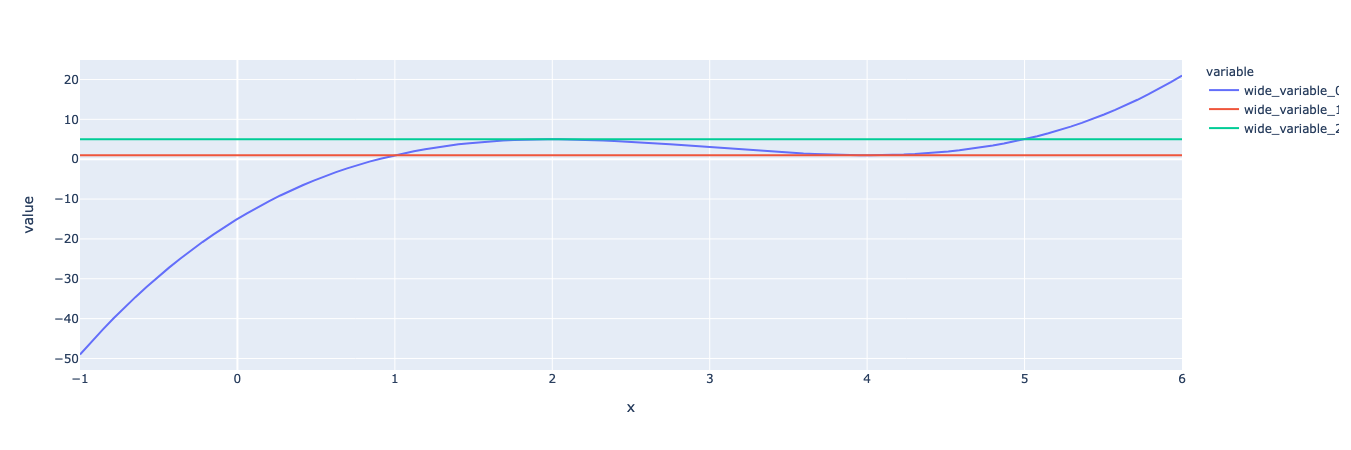

In [45]:
fig = px.line(x=x, y=[p(x),z,t])
fig.show()

In [15]:
x = symbols('x')
k = symbols('k')

In [16]:
expr = x**3 - 9*x**2 + 24*x - 15

In [17]:
type(expr)

sympy.core.add.Add

In [18]:
pprint(expr)

 3      2            
x  - 9⋅x  + 24⋅x - 15


In [19]:
pprint(expr.diff())

   2            
3⋅x  - 18⋅x + 24


In [23]:
sol = solveset(expr.diff(), x)
sol

In [21]:
G=list(sol)[0]

In [22]:
solve(G, k)

In [97]:
list(sol)[0].subs(k, 15).evalf()

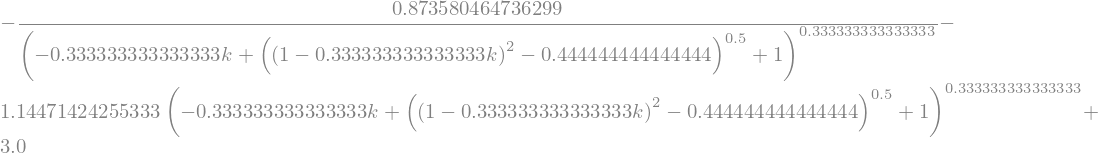

In [65]:
N(_)

In [36]:
solveset(expr.diff())

In [37]:
N(_)

In [20]:

# Global optimization
grid = (1, 3, 0.01)
xmin_global = optimize.brute(p, (grid, ))
print("Global minima found %s" % xmin_global)

xmin_local = optimize.fminbound(p, -1, 4)
print("Local minimum found %s" % xmin_local)

Global minima found [2.21523047]
Local minimum found 2.2152510498307847


In [21]:
def f(x):
    return 3*x**4 -140*x**3

In [22]:
def df(x):
    return 12*x**3 - 420*x**2

In [23]:
x = np.linspace(-10, 40 ,200)

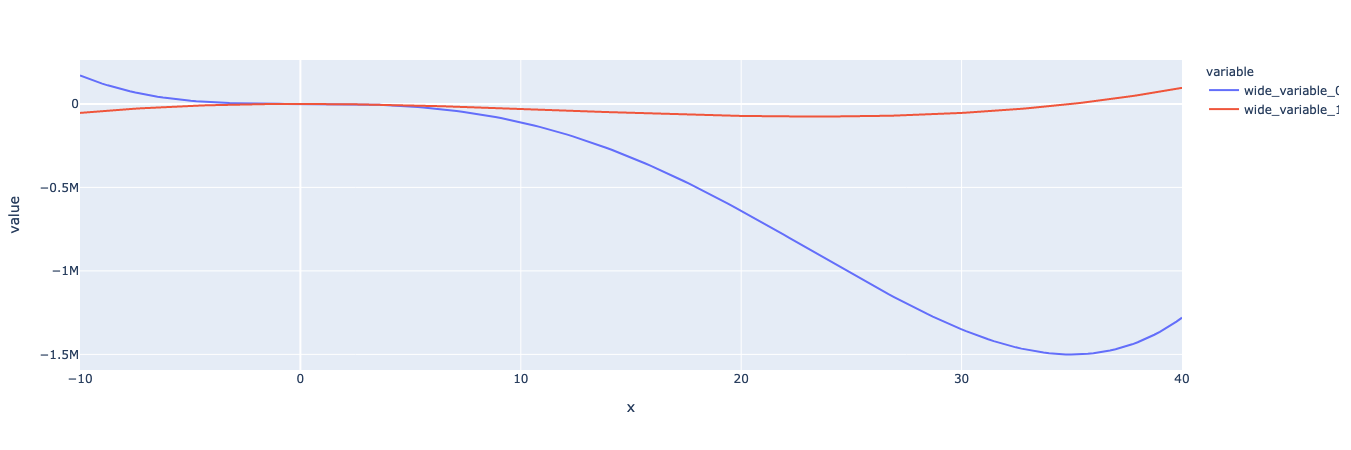

In [24]:
fig = px.line(x=x, y=[f(x), df(x)])
fig.show()

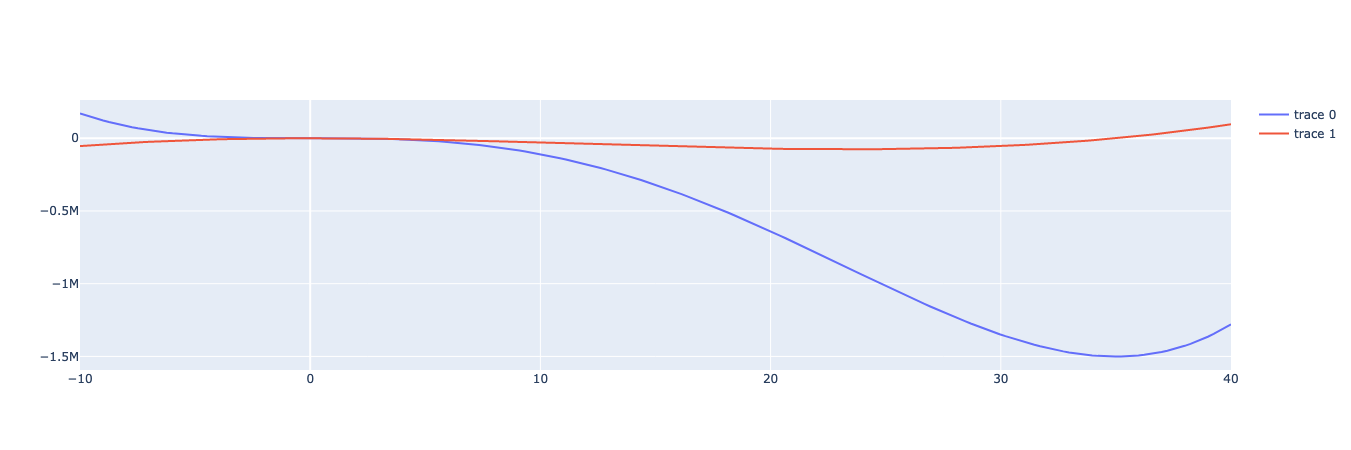

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=df(x)))
fig.show()

In [26]:
x = Symbol('x')

In [27]:
polynomial = 3*x**4-140*x**3

In [28]:
polynomial.expand()

In [29]:
polynomial.factor()

In [30]:
equation = Eq(polynomial, 0)
equation

In [31]:
roots(Eq(polynomial.diff(),0))

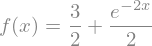

In [32]:
f = Function('f')
a = Symbol('a')
ics = {f(0): 2, f(x).diff(x).subs(x, 0): -1}
dsolve(f(x).diff(x) - 3 + 2*f(x), f(x), ics=ics)

In [33]:
ics = {f(0): 1.8}
dsolve(f(x).diff(x) + 0.03 * f(x), f(x), ics=ics)

In [34]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-15, 50), y_lim=(-20, 50), ax=None):
    f_np = lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(10, 10))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)

    ax.axis('tight') 
    ax.set_title(r"$%s$" %
                 (latex(Eq(f(x).diff(x), f_xy))),
                 fontsize=18)
    return ax

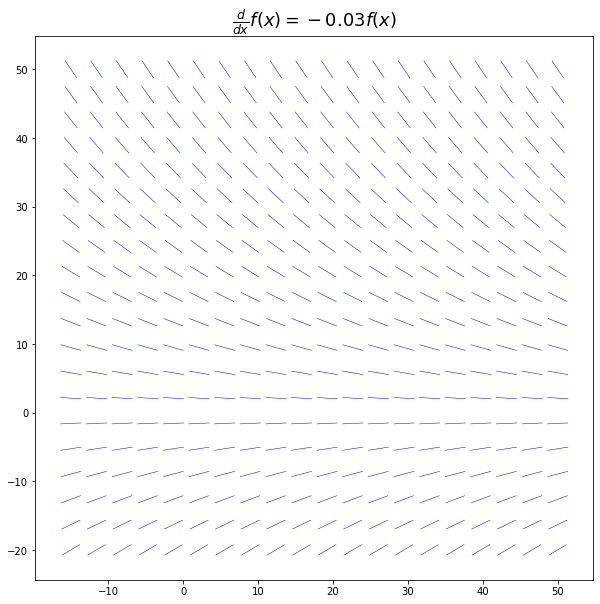

In [35]:
x = symbols("x")
f = Function("f")
plot_direction_field(x, f(x), -0.03* f(x))

In [76]:
A = np.array([[-2, 1], [3/4, 1]])
B = np.array([-5, 1/2])
X = np.linalg.inv(A).dot(B)

print(X)

[ 2. -1.]
